# WeatherPy
----


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from itertools import combinations
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

597

### Perform API Calls

In [3]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [4]:
# set up lists to hold reponse info
lat = []
lon=[]
temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []
city_list = []

#count records and set numbers
record_num = 0
set_num = 1

In [5]:
print('''
Beginning Data Retrieval     
-----------------------------
''')   

# Loop through the list of cities and perform a request for data on each
for city in cities:
    try: 
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        
        if record_num ==50:
            set_num += 1
            record_num = 1 
            city_list.append(city)
        
        else:
            record_num += 1 
            city_list.append(city)
        print(f"Processing Record {record_num} of Set {set_num} | {city} ")
    
    except (KeyError,IndexError):
        print ("City not found. Skipping...")
        
print('''
Data Retrieval Complete    
-----------------------------
''')  
    


Beginning Data Retrieval     
-----------------------------

Processing Record 1 of Set 1 | shenjiamen 
Processing Record 2 of Set 1 | mataura 
Processing Record 3 of Set 1 | tezu 
Processing Record 4 of Set 1 | samarai 
Processing Record 5 of Set 1 | rikitea 
Processing Record 6 of Set 1 | kodiak 
Processing Record 7 of Set 1 | sioux lookout 
Processing Record 8 of Set 1 | jamestown 
City not found. Skipping...
Processing Record 9 of Set 1 | hithadhoo 
Processing Record 10 of Set 1 | saint-philippe 
Processing Record 11 of Set 1 | barrow 
Processing Record 12 of Set 1 | ushuaia 
City not found. Skipping...
Processing Record 13 of Set 1 | chokurdakh 
Processing Record 14 of Set 1 | dikson 
Processing Record 15 of Set 1 | puerto ayora 
Processing Record 16 of Set 1 | poum 
Processing Record 17 of Set 1 | lagoa 
Processing Record 18 of Set 1 | busselton 
Processing Record 19 of Set 1 | miandrivazo 
Processing Record 20 of Set 1 | ribeira grande 
Processing Record 21 of Set 1 | vaini 
Pr

Processing Record 34 of Set 4 | bandarbeyla 
Processing Record 35 of Set 4 | shush 
Processing Record 36 of Set 4 | nikolskoye 
City not found. Skipping...
Processing Record 37 of Set 4 | rafsanjan 
Processing Record 38 of Set 4 | mehar 
Processing Record 39 of Set 4 | algiers 
Processing Record 40 of Set 4 | asau 
Processing Record 41 of Set 4 | batagay-alyta 
Processing Record 42 of Set 4 | akdepe 
City not found. Skipping...
Processing Record 43 of Set 4 | bouna 
Processing Record 44 of Set 4 | hasaki 
Processing Record 45 of Set 4 | zvenigovo 
Processing Record 46 of Set 4 | ponta do sol 
Processing Record 47 of Set 4 | guiratinga 
Processing Record 48 of Set 4 | vostok 
Processing Record 49 of Set 4 | mongo 
Processing Record 50 of Set 4 | neringa 
Processing Record 1 of Set 5 | sidi ali 
Processing Record 2 of Set 5 | pacific grove 
Processing Record 3 of Set 5 | naze 
Processing Record 4 of Set 5 | nome 
City not found. Skipping...
Processing Record 5 of Set 5 | sao joao da barr

Processing Record 16 of Set 8 | cabedelo 
Processing Record 17 of Set 8 | praia da vitoria 
Processing Record 18 of Set 8 | kang 
Processing Record 19 of Set 8 | chicama 
Processing Record 20 of Set 8 | zharkent 
Processing Record 21 of Set 8 | adrar 
Processing Record 22 of Set 8 | aquiraz 
Processing Record 23 of Set 8 | venancio aires 
Processing Record 24 of Set 8 | san vicente 
Processing Record 25 of Set 8 | moskovskoye 
Processing Record 26 of Set 8 | grand gaube 
Processing Record 27 of Set 8 | port hardy 
Processing Record 28 of Set 8 | ambilobe 
Processing Record 29 of Set 8 | sines 
Processing Record 30 of Set 8 | apt 
Processing Record 31 of Set 8 | kawalu 
Processing Record 32 of Set 8 | kloulklubed 
Processing Record 33 of Set 8 | lazaro cardenas 
Processing Record 34 of Set 8 | gisenyi 
Processing Record 35 of Set 8 | duvan 
Processing Record 36 of Set 8 | necochea 
Processing Record 37 of Set 8 | olathe 
Processing Record 38 of Set 8 | tatarsk 
Processing Record 39 of S

### Convert Raw Data to DataFrame


In [6]:
#create dictionary to dreate data frame
city_dict = {
    "City": city_list,
    "Lat": lat, 
    "Lng": lon, 
    "Max Temp": temp, 
    "Humidity": humidity,
    "Cloudiness": clouds, 
    "Wind Speed": wind_speed, 
    "Country": country, 
    "Date": date }
    
#create data frame
city_dict= pd.DataFrame(city_dict)

In [7]:
#export the city data into a .csv.
city_dict.to_csv("cities.csv", index=False)

In [22]:
#print dataframe
weather_df= pd.DataFrame(city_dict)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,shenjiamen,29.9576,122.2980,81.23,90,100,12.03,CN,1630870398
1,mataura,-46.1927,168.8643,54.48,84,100,3.51,NZ,1630870399
2,tezu,27.9167,96.1667,78.31,80,17,3.47,IN,1630870399
3,samarai,-10.6167,150.6667,77.63,74,100,13.53,PG,1630870399
4,rikitea,-23.1203,-134.9692,74.28,74,82,13.56,PF,1630870400
...,...,...,...,...,...,...,...,...,...
540,comodoro rivadavia,-45.8667,-67.5000,57.06,47,0,3.44,AR,1630870605
541,russell,32.3502,-85.1999,89.96,62,20,3.44,US,1630870605
542,upington,-28.4478,21.2561,59.38,20,100,5.75,ZA,1630870606
543,los llanos de aridane,28.6585,-17.9182,74.95,87,20,2.30,ES,1630870606


## Plotting the Data


## Latitude vs. Temperature Plot

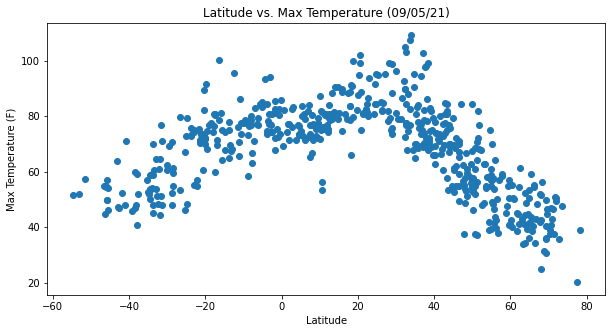

In [23]:
latitude = weather_df['Lat']
temperature = weather_df['Max Temp']

plt.figure(figsize=[10,5])

# Plot the lat vs the max temp
plt.scatter(x = latitude, y = temperature)

# Add labeling
# This extracts the date and returns it in the local time zone
# lat_time_plt = datetime.fromtimestamp(city_dict.loc[0,"Date"]).strftime('%Y-%m-%d')
plt.title(f"Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Modify ticks
# plt.xlim(-80,100)
# plt.ylim(min(temperature) - 10 , max(temperature) +10)
plt.savefig('Latitude vs. Temperature Plot.png', bbox_inches='tight')

This code is analizing how hot the temperature gets along all latitudes of the selected cities. We can that the hottest temperatures happen between -20 and 40 latitude which would include the contries of Africa and Europe. 

## Latitude vs. Humidity Plot

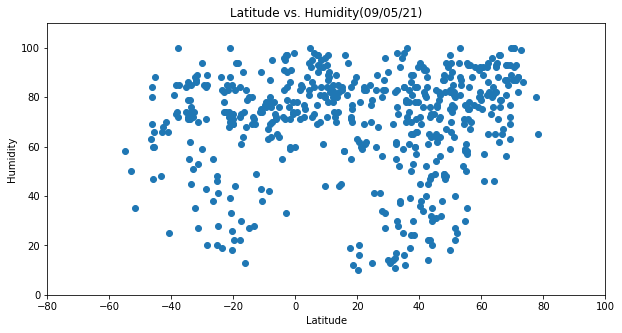

In [24]:

plt.figure(figsize=(10,5));

# Plot the lat vs humidity
plt.scatter(x = weather_df['Lat'], y = weather_df['Humidity']);

# Add labeling
# This extracts the date and returns it in the local time zone
plt.title(f"Latitude vs. Humidity({time.strftime('%x')})");
plt.xlabel("Latitude");
plt.ylabel("Humidity");

# Modify ticks
plt.xlim(-80,100);
plt.ylim(min(humidity) - 10 , max(humidity) +10);
plt.savefig('Latitude vs. Humidity Plot.png', bbox_inches='tight')

## Latitude vs. Cloudiness Plot

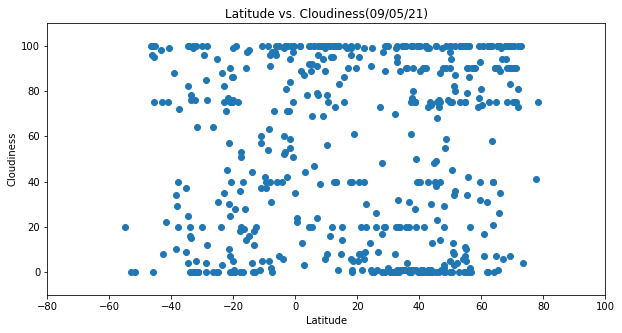

In [25]:
plt.figure(figsize=(10,5));

# Plot the lat vs Cloudiness
plt.scatter(x = weather_df['Lat'], y = weather_df['Cloudiness']);

# Add labeling
# This extracts the date and returns it in the local time zone

plt.title(f"Latitude vs. Cloudiness({time.strftime('%x')})");
plt.xlabel("Latitude");
plt.ylabel("Cloudiness");

# Modify ticks
plt.xlim(-80,100);
plt.ylim(min(clouds) - 10 , max(clouds) +10);
plt.savefig('Latitude vs. Cloudiness Plot.png', bbox_inches='tight')

## Latitude vs. Wind Speed Plot

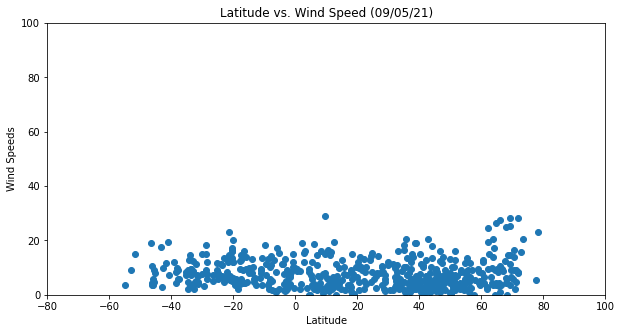

In [26]:
plt.figure(figsize=(10,5));

# Plot the lat vs Wind
plt.scatter(x = weather_df['Lat'], y = weather_df['Wind Speed']);

# Add labeling
plt.title(f"Latitude vs. Wind Speed ({time.strftime('%x')})");
plt.xlabel("Latitude");
plt.ylabel("Wind Speeds");

# Modify ticks
plt.xlim(-80,100);
plt.ylim(min(clouds) , max(clouds) );
plt.savefig('Latitude vs. Wind Speed Plot.png', bbox_inches='tight')

## Linear Regression

In [29]:
northern = weather_df[weather_df['Lat']>=0]
southern = weather_df[weather_df['Lat']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5377285641039357


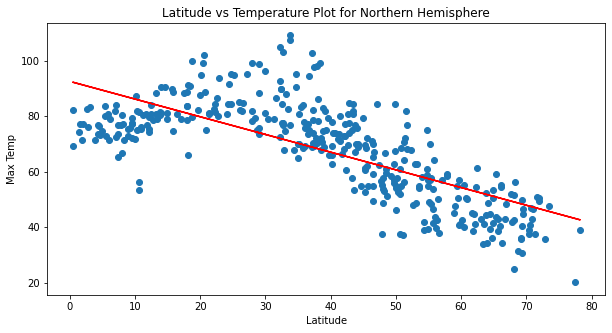

In [49]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern['Lat'], northern['Max Temp'])
regress_values = northern['Lat']*slope + intercept

plt.figure(figsize=(10,5));

plt.scatter(northern['Lat'], northern['Max Temp'], )
plt.title("Latitude vs Temperature Plot for Northern Hemisphere"), 
plt.xlabel("Latitude"), 
plt.ylabel("Max Temp");
plt.plot(northern['Lat'], regress_values, 'r-');
print(f"The r-squared is: {rvalue**2}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression